In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

for conception : https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini

Create Data
* create
* split

In [2]:
X = tf.range(-100,100,4,dtype=tf.float32)
y = X + 10

In [3]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

print(len(X_train), len(X_test))

40 10


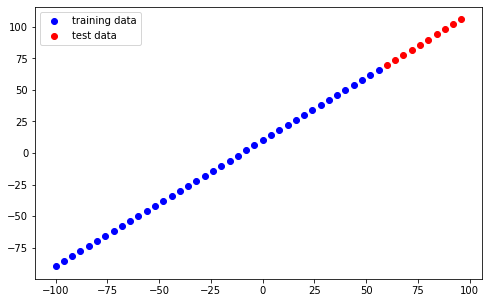

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, c='b', label='training data')
plt.scatter(X_test, y_test,c='r',label='test data')
plt.legend();

Modelling

In [5]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, y_train, epochs=500, verbose=0) # verbose = [0,1,2] 0 for not show epoch process in task bar

In [8]:
y_pred = model.predict(X_test)
X_test, y_test ,y_pred 

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>,
 array([[ 70.66081 ],
        [ 75.138275],
        [ 79.61574 ],
        [ 84.0932  ],
        [ 88.57065 ],
        [ 93.04802 ],
        [ 97.5254  ],
        [102.00278 ],
        [106.48016 ],
        [110.95753 ]], dtype=float32))

In [9]:
def ShowResult(X_test=X_test,y_test=y_test,y_pred=y_pred):
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_pred, c='r', label = 'y_predict')
    plt.scatter(X_test, y_test, c='b', label = 'y_test')
    plt.legend();

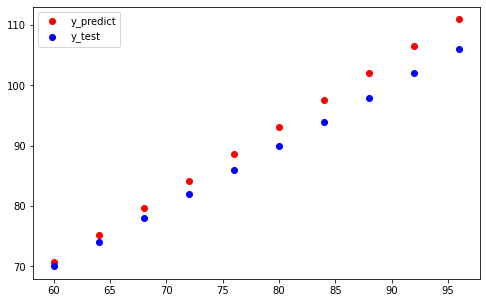

In [10]:
ShowResult()

Evaluate

In [11]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 103ms/step - loss: 2.8093 - mae: 2.8093


[2.8092544078826904, 2.8092544078826904]

In [12]:
def MeanAbsErr(y_test=y_test,y_pred=y_pred,show=0):
    MAE = 0
    for id, x in enumerate(y_test):
        y = float(y_pred[id])
        diff = float(abs(x-y))
        MAE += diff
        
        if show :
            print(f'>>> {id+1}. |{x:.4f}-{y:.4f}| = {diff:.4f}')
        
    MAE = round(MAE/len(y_test),6)
    return MAE

In [13]:
MeanAbsErr(y_test,y_pred,show=0)

2.809256

In [14]:
print(y_pred.shape , y_test.shape) # not same shape 
y_pred = tf.squeeze(y_pred) # change from (10,1) to (10,) "Removes dimensions of size 1 from the shape of a tensor"

MAE = tf.keras.losses.MAE(y_test,y_pred)
print(MAE)

(10, 1) (10,)
tf.Tensor(2.809256, shape=(), dtype=float32)


In [15]:
tf.keras.losses.MSE(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=9.772269>

SAVE AND LOAD MODEL

In [17]:
model.save('best_model')
# model.save('best_model.h5')

INFO:tensorflow:Assets written to: best_model\assets


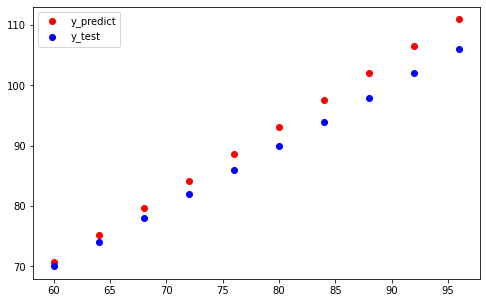

In [25]:
load_model = tf.keras.models.load_model('best_model')
y_pred = load_model.predict(X_test)
ShowResult(X_test,y_test,y_pred)